# Load Packages

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re
import seaborn as sns
import string
import tweepy as tw

# nltk packages
import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer

# Sklearn packages
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.datasets import load_digits

nltk.download('punkt')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/danielpearl/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/danielpearl/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## Extract Twitter Data using Tweepy API

In [ ]:
'''
#Instantiate tweepy API --- API keys have been removed 
consumer_key= 'TKlbEydyWnvDXXXXXXXXX'
consumer_secret= 'AsmEHtBqdsOw3vWXiqfXXXXXXXXX'
access_token= '44821419-FvKUyjDgtQA2KzWNqjhzXXXXXXXXXXX'
access_token_secret= 'Bdj79RfElHp5CQm3CirblXXXXXXXXXXXXXXXX'

auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

# Define the search term and the date_since date as variables
search_words = "#news"
'''

In [ ]:
''''
# Collect tweets
tweets = tw.Cursor(api.search,
              q=search_words,
              lang="en",
              tweet_mode = "extended",  
              include_rts=False,).items(3000) 

In [ ]:
''''
#save tweets
searched_tweets = [status._json for status in tweets]
json_strings = [json.dumps(json_obj) for json_obj in searched_tweets]  


In [ ]:
''''
# Write to json file
with open("news.json", "w", encoding='utf8') as f: 
    f.write('[')
    for i,x in enumerate(json_strings):
        f.write(x)
        if i != len(json_strings) - 1:
            f.write(",")
        
    f.write(']')

In [ ]:

# Open json file 'read'
#with open('news.json', 'r') as tweetfile:
 # newstweets = json.loads(tweetfile.read())

In [ ]:
# Save tweets into pd dataframe
#news_tweets = pd.read_json('news.json')
#print(news_tweets.head())

In [ ]:
# Save to csv file to distribute to the rest of the groupmembers
#news_tweets.to_csv('news_tweet.csv', index = False)


# Read Files

In [16]:
# Read in files
file_path = "/Downloads/IST736_Project/"
reddit_comments_file = "train-balanced-sarcasm.csv"
sarcastic_twitter_api_file = "sarcastic_tweets.csv"
news_twitter_file = "news_tweets.csv"
sarcastic_twitter_narcis_file = "sarcasm.csv"

In [8]:
# Load Reddit Comments
reddit_comments = pd.read_csv(file_path + reddit_comments_file).sample(2000)
reddit_comments.head(5)

,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment
190181,1,Monopolies ftw!,FrankeyMankey,pcmasterrace,1,1,0,2016-07,2016-07-22 16:58:46,NEW TITAN X PASCAL
568605,1,"This can't be true, I thought ISIS was Iranian",ForeverInquest,saudiarabia,8,8,0,2015-07,2015-07-19 22:43:51,Saudi Arrests 431 People with Links to ISIL
160459,1,Did you know that Donald Trump never does anyt...,RevoltOfTheCentrists,television,1,1,0,2016-09,2016-09-23 03:03:51,"To all the people saying ""It's a PR move!"" lik..."
116929,0,"Breaking Bad for me, but Fargo has some pretty...",SceneryExplorer,television,1,-1,-1,2016-11,2016-11-20 22:49:21,"In your opinion, which show has the best cinem..."
316671,1,"Also lets me real, who is she to know why a fa...",Dornish_Bad_Poosi,TumblrInAction,5,5,0,2016-07,2016-07-26 04:46:09,"Yeah, why don't you tell that to their face th..."


In [9]:
# Load Sarcastic Tweets
sarcastic_tweets = pd.read_csv(file_path + sarcastic_twitter_api_file).sample(1000)
sarcastic_tweets['label'] = 1 
sarcastic_tweets.head(5)

,created_at,id_str,full_text,truncated,display_text_range,entities,metadata,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,...,geo,coordinates,place,is_quote_status,retweet_count,favorite_count,favorited,retweeted,lang,label
2635,2020-11-18 06:41:38+00:00,1.328950e+18,Coding Jokes To Add Some #Humor in Our Day!\n\...,False,"[0, 279]","{'hashtags': [{'text': 'Humor', 'indices': [25...","{'iso_language_code': 'en', 'result_type': 're...",NaN,NaN,NaN,...,NaN,NaN,NaN,False,5,2,False,False,en,1
134,2020-11-26 06:14:42+00:00,1.331840e+18,@hmfaigen @Jerry3D2Y Nowadays you have to end ...,False,"[21, 68]","{'hashtags': [{'text': 'sarcasm', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...",1.330000e+18,1.330000e+18,3.457628e+08,...,NaN,NaN,NaN,False,0,2,False,False,en,1
1668,2020-11-21 12:41:17+00:00,1.330130e+18,@BJP4India Please make it like UP. Facing to m...,False,"[11, 94]","{'hashtags': [{'text': 'sarcasm', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...",1.330000e+18,1.330000e+18,2.078093e+08,...,NaN,NaN,NaN,False,0,1,False,False,en,1
1014,2020-11-23 10:16:51+00:00,1.330820e+18,@JudyLee81046752 Nothing...\n#SARCASM,False,"[17, 36]","{'hashtags': [{'text': 'SARCASM', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...",1.330000e+18,1.330000e+18,1.270000e+18,...,NaN,NaN,NaN,False,0,1,False,False,en,1
1358,2020-11-22 09:49:20+00:00,1.330450e+18,RT @khalidkoree: Home delivery 😜\n#sarcasm htt...,False,"[0, 65]","{'hashtags': [{'text': 'sarcasm', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...",NaN,NaN,NaN,...,NaN,NaN,NaN,False,9,0,False,False,en,1


In [17]:
# # Load News Tweets
news_tweets  = pd.read_csv(file_path + news_twitter_file).sample(1000)
news_tweets['label'] = 0
news_tweets.head(5)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,metadata,source,...,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,contributors,is_quote_status,retweet_count,label
891,2020-12-09 13:41:23+00:00,1.336670e+18,1.336670e+18,Nozomi and Chinook team to deliver OT and IoT ...,False,"[0, 183]","{'hashtags': [{'text': 'IoT', 'indices': [133,...",NaN,"{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://ifttt.com"" rel=""nofollow"">IFT...",...,NaN,NaN,"{'id': 483862860, 'id_str': '483862860', 'name...",NaN,NaN,NaN,NaN,False,1,0
76,2020-12-09 14:52:41+00:00,1.336690e+18,1.336690e+18,RT @MRCJUSTRIDEIT: 🔴 BIG NEWS: ISRAEL Scientis...,False,"[0, 140]","{'hashtags': [{'text': 'Aliens', 'indices': [7...",NaN,"{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",...,NaN,NaN,"{'id': 1050277841965735936, 'id_str': '1050277...",NaN,NaN,NaN,NaN,False,1,0
2845,2020-12-09 09:54:08+00:00,1.336610e+18,1.336610e+18,"Gayle King Says Follow Ex-Presidents, Science ...",False,"[0, 118]","{'hashtags': [{'text': 'news', 'indices': [113...",NaN,"{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://newspages.com"" rel=""nofollow""...",...,NaN,NaN,"{'id': 1910333690, 'id_str': '1910333690', 'na...",NaN,NaN,NaN,NaN,False,0,0
1955,2020-12-09 11:44:07+00:00,1.336640e+18,1.336640e+18,Trump Uses COVID Vaccine Summit to Pressure Re...,False,"[0, 275]","{'hashtags': [{'text': 'News', 'indices': [255...","{'media': [{'id': 1336637742155894786, 'id_str...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://social-dog.net/"" rel=""nofollo...",...,NaN,NaN,"{'id': 1104382519481327616, 'id_str': '1104382...",NaN,NaN,NaN,NaN,False,0,0
2103,2020-12-09 11:26:55+00:00,1.336630e+18,1.336630e+18,RT @TradingKaFunda_: Buy:- ZEE future @ 218\nS...,False,"[0, 140]","{'hashtags': [{'text': 'tradingkafunda', 'indi...",NaN,"{'iso_language_code': 'en', 'result_type': 're...",NaN,...,NaN,NaN,"{'id': 1295974009679486976, 'id_str': '1295974...",NaN,NaN,NaN,NaN,False,2,0


In [18]:
# Load Narcis Tweets
narcis_tweets  = pd.read_csv(file_path + sarcastic_twitter_narcis_file).sample(1000)
narcis_tweets.head(5)

,Tweet,Reverse,label
1594,i love being sick on the weekend,weekend the on sick being love i,1
492,So I accidentaly took over the whole room and ...,#rushed BTW.. TOMORROW COMING IS roomate.WHO m...,0
1104,i love bring creeped on at work #leavemealone,#leavemealone work at on creeped bring love i,1
179,"Lol ? RT""USER When I'm high, I turn into a Cer...","Killer."" Cereal a into turn I high, I'm When R...",0
1426,i love getting yelled at this early in the mor...,#thebest morning the in early this at yelled g...,1


# Merge and Clean Files

In [19]:
# Merge sarcastic and non-sarcastic twitter files
twitter_df = pd.concat([sarcastic_tweets, news_tweets])
twitter_df.head(5)

,created_at,id_str,full_text,truncated,display_text_range,entities,metadata,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,...,retweet_count,favorite_count,favorited,retweeted,lang,label,id,extended_entities,source,contributors
2635,2020-11-18 06:41:38+00:00,1.328950e+18,Coding Jokes To Add Some #Humor in Our Day!\n\...,False,"[0, 279]","{'hashtags': [{'text': 'Humor', 'indices': [25...","{'iso_language_code': 'en', 'result_type': 're...",NaN,NaN,NaN,...,5,2.0,False,False,en,1,NaN,NaN,NaN,NaN
134,2020-11-26 06:14:42+00:00,1.331840e+18,@hmfaigen @Jerry3D2Y Nowadays you have to end ...,False,"[21, 68]","{'hashtags': [{'text': 'sarcasm', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...",1.330000e+18,1.330000e+18,3.457628e+08,...,0,2.0,False,False,en,1,NaN,NaN,NaN,NaN
1668,2020-11-21 12:41:17+00:00,1.330130e+18,@BJP4India Please make it like UP. Facing to m...,False,"[11, 94]","{'hashtags': [{'text': 'sarcasm', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...",1.330000e+18,1.330000e+18,2.078093e+08,...,0,1.0,False,False,en,1,NaN,NaN,NaN,NaN
1014,2020-11-23 10:16:51+00:00,1.330820e+18,@JudyLee81046752 Nothing...\n#SARCASM,False,"[17, 36]","{'hashtags': [{'text': 'SARCASM', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...",1.330000e+18,1.330000e+18,1.270000e+18,...,0,1.0,False,False,en,1,NaN,NaN,NaN,NaN
1358,2020-11-22 09:49:20+00:00,1.330450e+18,RT @khalidkoree: Home delivery 😜\n#sarcasm htt...,False,"[0, 65]","{'hashtags': [{'text': 'sarcasm', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...",NaN,NaN,NaN,...,9,0.0,False,False,en,1,NaN,NaN,NaN,NaN


In [20]:
def clean_text(txt):
    '''
    Function to clean text
    '''
    txt = re.sub(r'[,.;@#?!&$\-\']+', '', txt, flags=re.IGNORECASE)    # Replace punctuation with space
    txt = re.sub(r'\ +', ' ', txt, flags=re.IGNORECASE)                # Accept one or more copies of punctuation
    txt = re.sub(r'\"', ' ', txt, flags=re.IGNORECASE)                 # Replace quote mark with space
    txt = re.sub(r'\\n', ' ', txt, flags=re.IGNORECASE)                # Replace end line with space
    txt = re.sub(r'[^a-zA-Z]', ' ', txt, flags=re.VERBOSE)             # Replace any character that isn't a letter
    txt = re.sub(r'\b\w{1,1}\b', '', txt, flags=re.VERBOSE)            # Removes all words less than 1 letters
    txt = re.sub(r'#sarcasm', '', txt, flags=re.VERBOSE)               # Removes all sarcasm hashtags
    txt = re.sub(r'sarcasm', '', txt, flags=re.IGNORECASE)             # Removes all sarcasm words
    txt = re.sub(r'#news', '', txt, flags=re.VERBOSE)                  # Removes all news hashtags
    txt = re.sub(r'news', '', txt, flags=re.IGNORECASE)                # Removes all news words

    return txt

In [21]:
def convert_to_list(df, col, l):
    '''
    Function to convert column to list
    '''
    # Iterate through data frame
    for row in df[col]:
        if col != 'label':
            # Convert row to string
            row = str(row)
            row = clean_text(row) 
        
        # Append row to list
        l.append(row)
        
    return l

In [22]:
text = []
labels = []

# Get twitter api lists
text = convert_to_list(twitter_df, 'full_text', text) 
labels = convert_to_list(twitter_df, 'label', labels) 

# Get arcis twitter lists
text = convert_to_list(narcis_tweets, 'Tweet', text) 
labels = convert_to_list(narcis_tweets, 'label', labels) 

# Get Reddit comments lists
text = convert_to_list(reddit_comments, 'comment', text) 
labels = convert_to_list(reddit_comments, 'label', labels) 

# Print length of lists
print(len(text))
print(len(labels))

# Show text
text[:10]

5000
5000


['Coding Jokes To Add Some Humor in Our Day  comicstrip ai artificialintelligence comicstrips funny informationtechnology itguyproblems doodle techjokes itjokes amateurcomics comics  office justforlaughs jokes MachineLearning funny coffeetime wednesday https   tco GELBmM  ',
 'hmfaigen Jerry   Nowadays you have to end tweets with  ',
 'BJP India Please make it like UP Facing to much Local competition from this region ',
 'JudyLee         Nothing ',
 'RT khalidkoree  Home delivery    https   tco WeiA gQYvI',
 ' Any team any time any place   https   tco HzmY     ',
 'RemoveSBMM CallofDuty Treyarch DavidVonderhaar THANKS  https   tco OBMjsn DYs',
 'RT goodhuebrewco  Ghania         ryanstruyk But there are no relatives or spouses Did they donate millions to his campaign  dont thi ',
 'Trying to add  Nintendo Switch to the cart at the exact time they go on sale is  fun game ',
 '  when used between people with established trust  can be  sign of high intelligence and good for your career Wai

In [65]:
# Create a dataframe with text and labels column for some quick EDA 
combined = {'text':text,'labels':labels}
combined_df = pd.DataFrame(combined)
print(combined_df)

                                                   text  labels
0     Coding Jokes To Add Some Humor in Our Day  com...       1
1     hmfaigen Jerry   Nowadays you have to end twee...       1
2     BJP India Please make it like UP Facing to muc...       1
3                              JudyLee         Nothing        1
4     RT khalidkoree  Home delivery    https   tco W...       1
...                                                 ...     ...
4995  Is this really  controversial opinion around here       0
4996                                     Better than          1
4997   dont know  liked the blue and white livery on...       0
4998                        Is he also literally Hitler       1
4999  He must be one of the good   white people   pa...       1

[5000 rows x 2 columns]


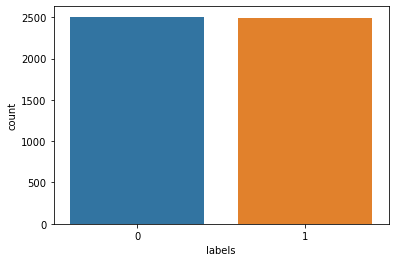

In [68]:
ax = sns.countplot(x="labels", data=combined_df)

# Instantiate Vectorizer

In [23]:
# Class to Lemmatize words
lemmmatizer = WordNetLemmatizer()

class LemmaTokenizer:
    def __init__(self):
        self.wnl = WordNetLemmatizer()
    def __call__(self, doc):
        return [self.wnl.lemmatize(t) for t in word_tokenize(doc)]

In [24]:
# Instantiate Count Vectorizer
cv = CountVectorizer(
        input ='content',                 # Input content
        analyzer = 'word',                # Break up text by words
        stop_words = 'english',           # Remove English stop words
        tokenizer = LemmaTokenizer(),     # Lemmatize words to their base
        strip_accents = 'unicode',        # Remove unicode characters
        ngram_range=(1, 3),               # Divide text into 1-3 word tokens
        max_features=1000                 # Return top words
)

In [82]:
# We will also use TFID to vectorize our data
TFIDF =TfidfVectorizer(input='content',
                        analyzer = 'word',
                        stop_words='english',
                        tokenizer= LemmaTokenizer(),
                        strip_accents = 'unicode', 
                        lowercase = True,
                        max_features=1000
                        )

# Get Word Frequency Data Frame

In [25]:
def create_df(text, vect):
    '''
    Create document term matrix data frame
    '''
    matrix = vect.fit_transform(text)                       # Apply CountVectorizer to get sparse matrix
    words = vect.get_feature_names()                        # Get vocab or column names
    df = pd.DataFrame(matrix.toarray(), columns = words)    # Convert matrix to a dataframe
    return df 

In [26]:
# Return dataframes for Count Vectorizer
df = create_df(text, cv)

# Print cleaned df
df.head(5)

C:\Users\Susan Rico\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:386: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


,able,absolutely,absolutely love,account,actually,actually added,actually added net,add,added,added net,...,yes,yh,yh gofr,young,youre,youtube,yup,zzfauvimfk,zzfauvimfk stayhome,zzfauvimfk stayhome read
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [85]:
# TFIDF data
df2 = create_df(text, TFIDF)

# Print cleaned df
df2.head(5)

,abc,able,absolutely,access,account,act,actually,add,added,age,...,yea,yeah,year,yes,yh,young,youre,youtube,yup,zzfauvimfk
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.245426,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Training and Testing

In [27]:
# Insert labels into data frame and get X, y values
X = df.copy() 
df['label'] = labels
y = df['label']

In [81]:
# Divide into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(3500, 1000) (1500, 1000) (3500,) (1500,)


In [86]:
# Insert labels into data frame and get X, y values for TFID data
X2 = df2.copy() 
df2['label'] = labels
y2 = df['label']

In [87]:
# Divide into training and testing
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3)
print(X2_train.shape, X2_test.shape, y2_train.shape, y2_test.shape)

(3500, 1000) (1500, 1000) (3500,) (1500,)


# Get Accuracy

In [29]:
def get_accuracy(model, pred, test, X, y):
    '''
    Returns Confusion matrix and accuracy score for validity
    '''
    # Get accuracy score
    score = accuracy_score(test, pred) 
    
    # Get cross validation score
    cv_scores = cross_val_score(model, X, y, cv=7, scoring='accuracy')

    # Get f1 statistic: F1 = 2 * (precision * recall) / (precision + recall)
    f_score = f1_score(test, pred, average='weighted') 
    
    # Create confusion matrix
    cm = confusion_matrix(pred, test) 

    # Create heatmap using Seaborn
    names = np.unique(pred)
    sns.heatmap(cm, 
                square=True,
                xticklabels=names, 
                yticklabels=names)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    
    # Print Scores
    print("Accuracy Score: \n{}\n".format(score))
    print("Cross Validation Score: \n{}\n".format(cv_scores.mean()))
    print("F1 Score: \n{}\n".format(f_score))
    print("Confusion Matrix: \n{}\n".format(cm))

# Naive Bayes

In [30]:
# Initiate naive Bayes model
nb = MultinomialNB()

# Train naive Bayes model
nb.fit(X_train, y_train)

# Create prediction from
nb_pred = nb.predict(X_test)

Naive Bayes Model
-----------------

Accuracy Score: 
0.672

Cross Validation Score: 
0.6937737332695315

F1 Score: 
0.6706811431139102

Confusion Matrix: 
[[463 191]
 [301 545]]



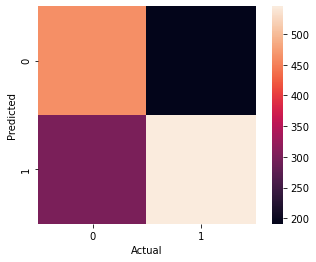

In [31]:
# Return Accuracy scores
print("Naive Bayes Model")
print("-----------------\n")
get_accuracy(nb, nb_pred, y_test, X, y)

# Support Vector Machines (Linear)

In [55]:
# Create SVM model 
svm = SVC(kernel = 'linear', C=1)

# Train SVM model for CV
svm.fit(X_train, y_train)

# Create prediction from SVM model
svm_pred = svm.predict(X_test)

In [ ]:
# Return Accuracy scores 
print("SVM Model")
print("---------\n")
get_accuracy(svm, svm_pred, y_test, X, y)

## cross validation scores for models including RandomForest, SVM, and NB (cv data)

In [95]:
score1 =cross_val_score(LogisticRegression(solver='liblinear',multi_class='ovr'),X, y,cv=5)
np.average(score1)

0.6774

In [69]:
# Support Vector Classification cross validation
score2=cross_val_score(SVC(gamma='auto'), X, y,cv=5)
np.average(score2)

0.6066

In [73]:
# Random Forest Classifier cross validation
score3=cross_val_score(RandomForestClassifier(n_estimators=40),X, y,cv=5)
np.average(score3)

0.6245999999999999

In [74]:
# Naive Bayes - Multinomial cross validation
score8=cross_val_score(MultinomialNB(),X, y,cv=5)
np.average(score8)

0.6534000000000001

## Cross validation scores including RandomForest, SVM, and NB (TFIDF)

In [91]:
#Tfid regression model
score4 =cross_val_score(LogisticRegression(solver='liblinear',multi_class='ovr'),X2, y2,cv=5)
np.average(score4)

0.648

In [92]:
#Tfid SVM
score5=cross_val_score(SVC(gamma='auto'), X2, y2,cv=5)
np.average(score5)

0.5012000000000001

In [93]:
# Tfid RandomForest
score6=cross_val_score(RandomForestClassifier(n_estimators=40),X2, y2,cv=5)
np.average(score6)

0.6228

In [90]:
# Tfid Naive Bayes
score7=cross_val_score(MultinomialNB(),X2, y2,cv=5)
np.average(score7)

0.6674

In [100]:
# Save model and accuracy information for plotting model scores
model =['LogisticRegression_CV','SVM_CV', 'RandomForest_CV','NaiveBayes_CV','LogisticRegression_TF','SVM_TF', 'RandomForest_TF','NaiveBayes_TF']
accuracy =[np.average(score1),np.average(score2),np.average(score3),np.average(score8),np.average(score4),np.average(score5),np.average(score6),np.average(score7)]

C:\Users\Susan Rico\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  after removing the cwd from sys.path.


Text(0.5, 0, 'Models')

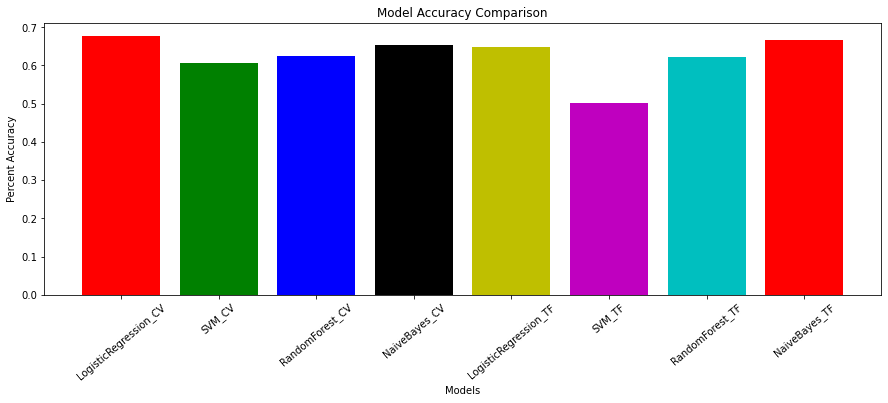

In [101]:
# Plot scores
my_colors = 'rgbkymc' 
plt.figure(figsize=(15,5))
plt.bar(model, accuracy,color=my_colors)
plt.xticks(rotation=40)
plt.title("Model Accuracy Comparison")
plt.ylabel('Percent Accuracy')
plt.xlabel('Models')



# Top Feature

## Look at top features for Naive Bayes Model

In [ ]:
# Save our features
features = np.array(cv.get_feature_names())

In [ ]:
#Look at top features for the NAIVE BAYES model
non_sarcasm_coeffs = pd.DataFrame({'feature': features, 'coeff': nb.feature_log_prob_[0]})
sarcasm_coeffs = pd.DataFrame({'feature': features, 'coeff': nb.feature_log_prob_[1]})

In [43]:
# Look at top 50 features for both candidates
# (Log probability, so very high probability corresponds to negative values closer to zero)
non_sarcasm_top = non_sarcasm_coeffs.sort_values('coeff').tail(50)
sarcasm_top = sarcasm_coeffs.sort_values('coeff').tail(50)



In [44]:
# Get top unique features by taking the symmetric difference of the top 50 for the two candidates
top_unique = list(set(non_sarcasm_top['feature']).symmetric_difference(set(sarcasm_top['feature'])))



In [48]:
# Get the key features for each candidate by finding the top ones in the unique list
non_sarcasm_key_features = non_sarcasm_top[non_sarcasm_top.apply(lambda x: x['feature'] in top_unique, axis=1)].head(30)
non_sarcasm_key_features.reset_index(drop=True, inplace=True)

sarcasm_key_features = sarcasm_top[sarcasm_top.apply(lambda x: x['feature'] in top_unique, axis=1)].head(30)
sarcasm_key_features.reset_index(drop=True, inplace=True)




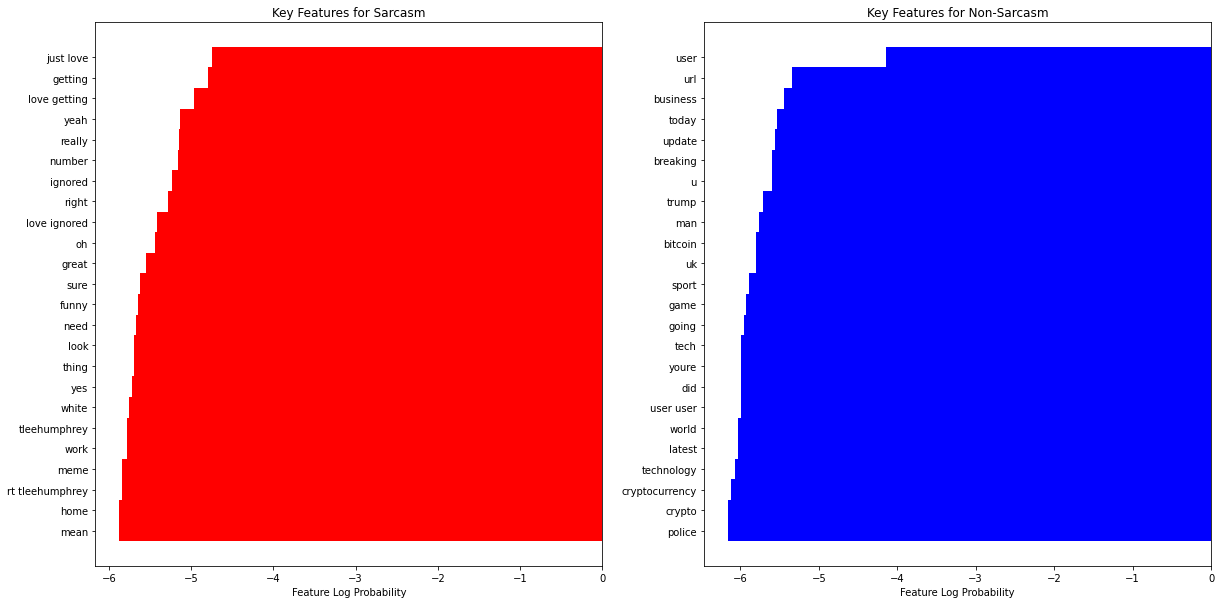

In [50]:
# Show these top features for each category along with their log probabilities
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=[20,10])
axs[0].barh(sarcasm_key_features['feature'], width=sarcasm_key_features['coeff'], height=1, color='red')
axs[0].set_title('Key Features for Sarcasm')
axs[0].set_xlabel('Feature Log Probability')
axs[1].barh(non_sarcasm_key_features['feature'], width=non_sarcasm_key_features['coeff'], height=1, color='blue')
axs[1].set_title('Key Features for Non-Sarcasm')
axs[1].set_xlabel('Feature Log Probability')
plt.show()


## Top Feature for SVM Model

[286 381 281 545 479 566 256 206 129 368]
[919 445 649 915  92 753 513 631 231 299]


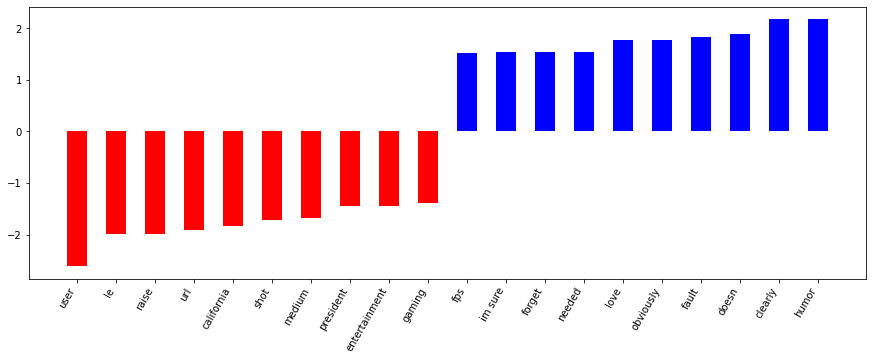

In [58]:
def plot_coefficients(MODEL=svm, COLNAMES=X_train.columns, top_features=10):
    ## Model if SVM MUST be SVC, RE: SVM_Model=LinearSVC(C=10)
    coef = svm.coef_.ravel()
    top_positive_coefficients = np.argsort(coef,axis=0)[-top_features:]
    print(top_positive_coefficients)
    top_negative_coefficients = np.argsort(coef,axis=0)[:top_features]
    print(top_negative_coefficients)
    top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
    # create plot
    plt.figure(figsize=(15, 5))
    colors = ["red" if c < 0 else "blue" for c in coef[top_coefficients]]
    plt.bar(  x=  np.arange(2 * top_features)  , height=coef[top_coefficients], width=.5,  color=colors)
    feature_names = np.array(COLNAMES)
    plt.xticks(np.arange(0, (2*top_features)), feature_names[top_coefficients], rotation=60, ha="right")
    plt.show()
    

plot_coefficients()